# Import Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

Load data

In [45]:
df = pd.read_csv("2022_Test_ML.csv")
df = df.drop(columns=['ind'])
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   s_mt    500 non-null    float64
 1   s_mq    500 non-null    float64
 2   d       500 non-null    float64
 3   h_p     500 non-null    float64
 4   QW      500 non-null    float64
 5   DP      500 non-null    float64
dtypes: float64(6)
memory usage: 23.6 KB
None
             s_mt        s_mq           d         h_p           QW           DP
count  500.000000  500.000000  500.000000  500.000000   500.000000   500.000000
mean     1.750000    1.450000    2.000000    7.000000  1498.578955   668.927498
std      0.550131    0.376406    0.579086    1.737257   163.293098   337.472251
min      0.800000    0.800000    1.000000    4.000000  1067.505110   261.554292
25%      1.275000    1.125000    1.500000    5.500000  1398.452956   410.931713
50%      1.750000    1.450000    2.000000    7.000000  1506.174741   554.7

Visualize feature distributions

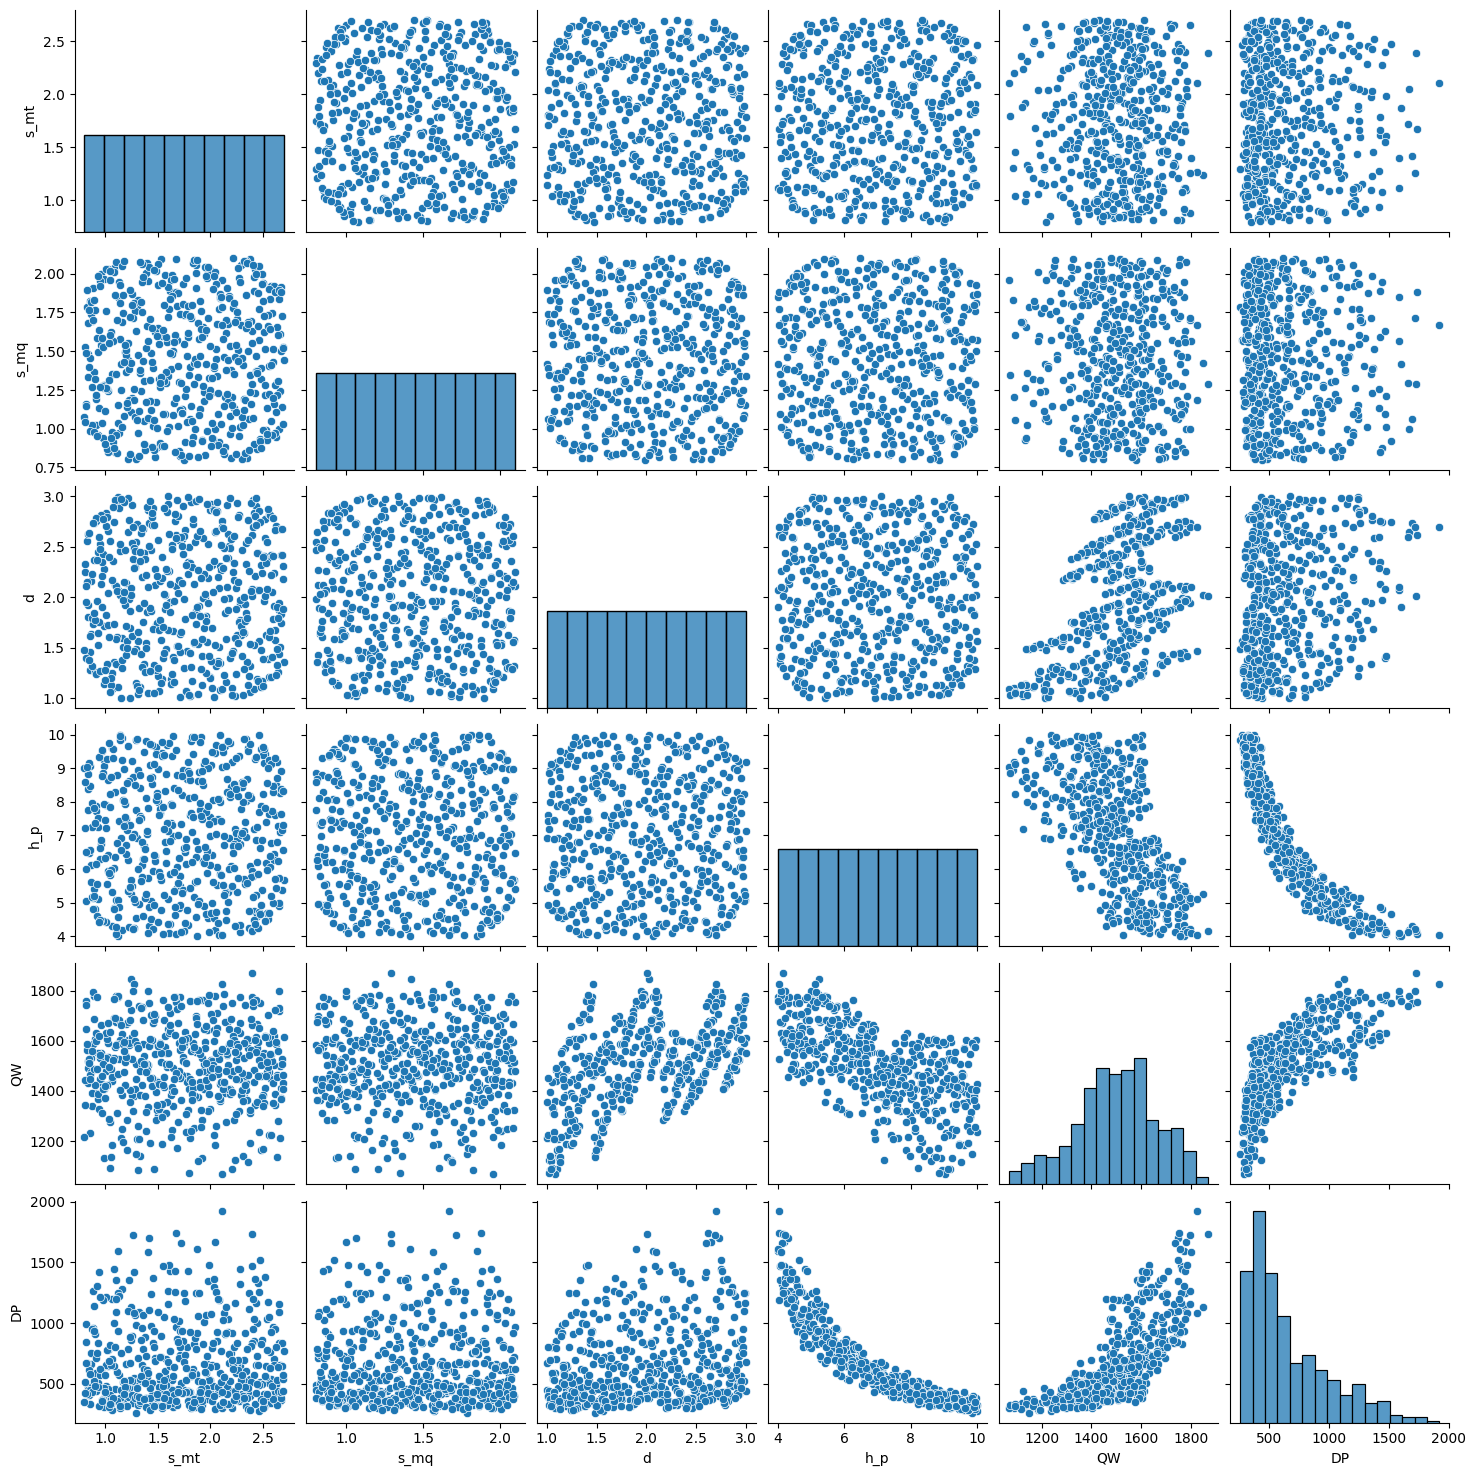

In [46]:
sns.pairplot(df)
plt.show()

Plot correlation matrix

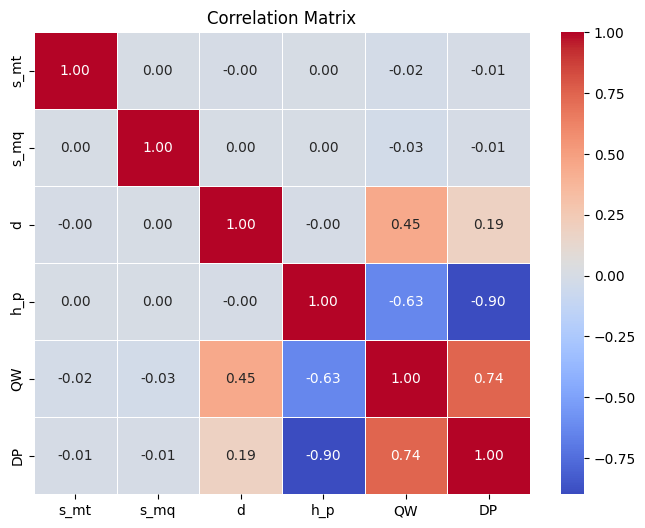

In [47]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Split into features and target variables

In [48]:
X = df[['s_mt', 's_mq', 'd', 'h_p']]
y = df[['QW', 'DP']]

Split data into train/test sets

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scale the data

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Define the parameter grid for GridSearchCV

In [51]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

Create the GridSearchCV object

In [52]:
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

Fit GridSearchCV to the training data

In [53]:
grid_search.fit(X_train_scaled, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R² Score: 0.8692699752304762


Train the model with the best parameters

In [54]:
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)

Make predictions

In [55]:
y_pred_train = best_model.predict(X_train_scaled)
y_pred_test = best_model.predict(X_test_scaled)

Evaluate the model

In [56]:
r2_train = r2_score(y_train, y_pred_train, multioutput='uniform_average')
r2_test = r2_score(y_test, y_pred_test, multioutput='uniform_average')
print(f'R² (Train): {r2_train:.3f}')
print(f'R² (Test): {r2_test:.3f}')

R² (Train): 0.985
R² (Test): 0.899


Analyze how R² changes with the number of training points

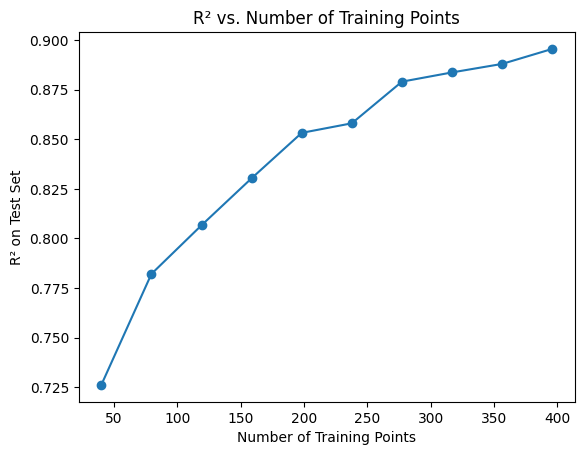

In [57]:
train_sizes = np.linspace(0.1, 0.99, 10)
r2_scores = []

for size in train_sizes:
    X_partial, _, y_partial, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    X_partial_scaled = scaler.transform(X_partial)
    best_model.fit(X_partial_scaled, y_partial)
    y_pred_partial = best_model.predict(X_test_scaled)
    r2_scores.append(r2_score(y_test, y_pred_partial, multioutput='uniform_average'))

# Visualize the results
plt.plot(train_sizes * len(X_train), r2_scores, marker='o')
plt.xlabel("Number of Training Points")
plt.ylabel("R² on Test Set")
plt.title("R² vs. Number of Training Points")
plt.show()